# Projet Machine-Learning par Antoine Théologien & Célian Vasson
## Test du multiclasse

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
from module import *
from mltools import *
from loss import *

output_dir = "../Rapport/Images"
os.makedirs(output_dir, exist_ok=True)

def load_usps(fn):
    with open(fn, "r") as f:
        f.readline()
        data = [[float(x) for x in l.split()] for l in f if len(l.split()) > 2]
    tmp = np.array(data)
    return tmp[:, 1:], tmp[:, 0].astype(int)

def get_usps(l, datax, datay):
    if type(l) != list:
        resx = datax[datay == l, :]
        resy = datay[datay == l]
        return resx, resy
    tmp = list(zip(*[get_usps(i, datax, datay) for i in l]))
    tmpx, tmpy = np.vstack(tmp[0]), np.hstack(tmp[1])
    return tmpx, tmpy

def SGD(network, datax, datay, loss, batch_size=10, lr=0.01, epochs=500):

    optimizer = Optim_old(network, loss, eps=lr)
    losses = []

    for epoch in range(epochs):
        indices = np.random.permutation(len(datax))  
        batch_losses = []

        for i in range(0, len(datax), batch_size):
            batch_x = datax[indices[i:i + batch_size]]
            batch_y = datay[indices[i:i + batch_size]]

            optimizer.step(batch_x, batch_y)  

            y_hat = network.forward(batch_x)
            batch_loss = loss.forward(batch_y, y_hat).mean()
            batch_losses.append(batch_loss)

        losses.append(np.mean(batch_losses))  

        if epoch % 50 == 0:
            print(f"Epoch {epoch}, Loss : {losses[-1]:.4f}")

    return losses, network




Epoch 0, Loss : 0.7153
Epoch 50, Loss : 0.0988
Epoch 100, Loss : 0.0622
Epoch 150, Loss : 0.0448


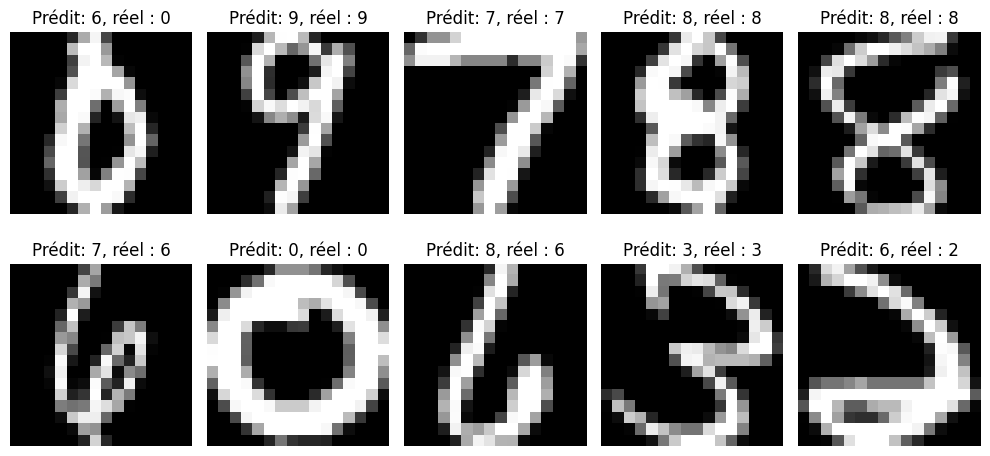

Accuracy globale : 0.7834


In [2]:
train_file = "../data/USPS_train.txt"
test_file = "../data/USPS_test.txt"

datax, datay = load_usps(train_file)
X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)


y_train_one_hot = np.eye(10)[y_train] 
y_test_one_hot = np.eye(10)[y_test]

network = Sequentiel_old(
    Linear(256, 128),  
    TanH(),
    Linear(128, 64),
    TanH(),
    Linear(64, 10),
    Softmax()   
)

loss_function = CrossEntropyLoss()

losses, trained_network = SGD(network, X_train, y_train_one_hot, loss_function, batch_size=32, lr=0.01, epochs=200)

indices = np.random.choice(len(X_test), 10, replace=False)

y_pred = network.forward(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    idx = indices[i]
    ax.imshow(X_test[idx].reshape(16, 16), cmap="gray")
    ax.set_title(f"Prédit: {y_pred_labels[idx]}, réel : {y_test[idx]}", fontsize=12)
    ax.axis("off")

plt.tight_layout()
output_path = os.path.join(output_dir, "multi1.png")
plt.savefig(output_path, dpi=300)
plt.show()



accuracy = np.mean(y_pred_labels == y_test)
print(f"Accuracy globale : {accuracy:.4f}")


Epoch 0, Loss : 0.9961
Epoch 50, Loss : 0.0040
Epoch 100, Loss : 0.0017
Epoch 150, Loss : 0.0011


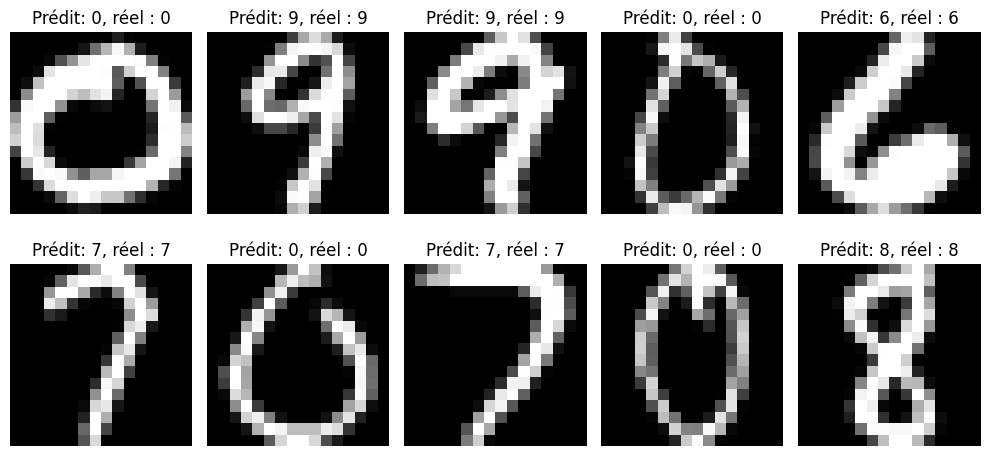

Accuracy globale : 0.9260


In [3]:
train_file = "../data/USPS_train.txt"
test_file = "../data/USPS_test.txt"

datax, datay = load_usps(train_file)
X_train, X_test, y_train, y_test = train_test_split(datax, datay, test_size=0.2, random_state=42)


y_train_one_hot = np.eye(10)[y_train] 
y_test_one_hot = np.eye(10)[y_test]

network = Sequentiel_old(
    Linear(256, 128),  
    TanH(),
    Linear(128, 64),
    TanH(),
    Linear(64, 10),
)

loss_function = LogCrossEntropyLoss()

losses, trained_network = SGD(network, X_train, y_train_one_hot, loss_function, batch_size=32, lr=0.01, epochs=200)

indices = np.random.choice(len(X_test), 10, replace=False)

y_pred = network.forward(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    idx = indices[i]
    ax.imshow(X_test[idx].reshape(16, 16), cmap="gray")
    ax.set_title(f"Prédit: {y_pred_labels[idx]}, réel : {y_test[idx]}", fontsize=12)
    ax.axis("off")

plt.tight_layout()
output_path = os.path.join(output_dir, "multi2.png")
plt.savefig(output_path, dpi=300)
plt.show()

accuracy = np.mean(y_pred_labels == y_test)
print(f"Accuracy globale : {accuracy:.4f}")
